# 测试集语义特征t-SNE降维可视化

抽取Pytorch训练得到的图像分类模型中间层的输出特征，作为输入图像的语义特征。

计算测试集所有图像的语义特征，使用t-SNE和UMAP两种降维方法降维至二维和三维，可视化。

分析不同类别的语义距离、异常数据、细粒度分类、高维数据结构。

同济子豪兄：https://space.bilibili.com/1900783

[代码运行云GPU环境](https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1)：GPU RTX 3060、CUDA v11.2

## 设置matplotlib中文字体

In [37]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [38]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [1]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei') # 中文字体
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

--2022-08-19 09:30:47--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
Connecting to 172.16.0.13:5848... connected.
Proxy request sent, awaiting response... 200 OK
Length: 10050868 (9.6M) [application/x-font-ttf]
Saving to: ‘/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf’

/environment/minico 100%[===================>]   9.58M  22.4MB/s    in 0.4s    

2022-08-19 09:30:48 (22.4 MB/s) - ‘/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf’ saved [10050868/10050868]



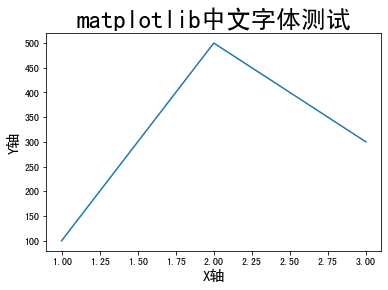

In [3]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

## 导入工具包

In [2]:
import numpy as np
import pandas as pd
import cv2

## 载入测试集图像语义特征

In [33]:
encoding_array = np.load('测试集语义特征.npy', allow_pickle=True)

In [34]:
encoding_array.shape

(1079, 512)

## 载入测试集图像分类结果

In [35]:
df = pd.read_csv('测试集预测结果.csv')

In [36]:
df.head()

,图像路径,标注类别ID,标注类别名称,top-1-预测ID,top-1-预测名称,top-2-预测ID,top-2-预测名称,top-3-预测ID,top-3-预测名称,top-n预测正确,...,草莓-预测置信度,荔枝-预测置信度,菠萝-预测置信度,葡萄-白-预测置信度,葡萄-红-预测置信度,西瓜-预测置信度,西红柿-预测置信度,车厘子-预测置信度,香蕉-预测置信度,黄瓜-预测置信度
0,fruit30_split/val/哈密瓜/106.jpg,0,哈密瓜,4.0,柚子,5.0,柠檬,7.0,梨,0.0,...,1.810175e-07,0.000001,0.000003,0.000010,0.000006,0.000111,1.294236e-04,3.994173e-07,0.000004,5.830796e-07
1,fruit30_split/val/哈密瓜/109.jpg,0,哈密瓜,6.0,桂圆,0.0,哈密瓜,8.0,椰子,1.0,...,8.460142e-08,0.000001,0.000001,0.001481,0.000045,0.000175,7.725556e-07,3.171619e-06,0.000033,2.559105e-06
2,fruit30_split/val/哈密瓜/114.jpg,0,哈密瓜,0.0,哈密瓜,26.0,西红柿,23.0,葡萄-白,1.0,...,9.829248e-03,0.007687,0.001150,0.040230,0.035187,0.001550,2.761092e-01,1.695518e-04,0.006084,1.219466e-03
3,fruit30_split/val/哈密瓜/116.jpg,0,哈密瓜,0.0,哈密瓜,16.0,芒果,4.0,柚子,1.0,...,4.417844e-05,0.000247,0.000071,0.001455,0.000003,0.000460,8.358340e-04,2.168997e-07,0.022086,4.123446e-04
4,fruit30_split/val/哈密瓜/118.png,0,哈密瓜,4.0,柚子,11.0,猕猴桃,23.0,葡萄-白,0.0,...,7.725807e-04,0.000075,0.000089,0.091698,0.000659,0.000463,3.796561e-03,3.087181e-08,0.000306,5.176165e-04


In [37]:
classes = df['标注类别名称'].unique()
print(classes)

['哈密瓜' '圣女果' '山竹' '杨梅' '柚子' '柠檬' '桂圆' '梨' '椰子' '榴莲' '火龙果' '猕猴桃' '石榴' '砂糖橘'
 '胡萝卜' '脐橙' '芒果' '苦瓜' '苹果-红' '苹果-青' '草莓' '荔枝' '菠萝' '葡萄-白' '葡萄-红' '西瓜'
 '西红柿' '车厘子' '香蕉' '黄瓜']


## 可视化配置

In [8]:
import seaborn as sns
marker_list = ['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', 'P', '*', 'h', 'H', '+', 'x', 'X', 'D', 'd', '|', '_', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [38]:
class_list = np.unique(df['标注类别名称'])

In [39]:
class_list

array(['哈密瓜', '圣女果', '山竹', '杨梅', '柚子', '柠檬', '桂圆', '梨', '椰子', '榴莲', '火龙果',
       '猕猴桃', '石榴', '砂糖橘', '胡萝卜', '脐橙', '芒果', '苦瓜', '苹果-红', '苹果-青', '草莓',
       '荔枝', '菠萝', '葡萄-白', '葡萄-红', '西瓜', '西红柿', '车厘子', '香蕉', '黄瓜'],
      dtype=object)

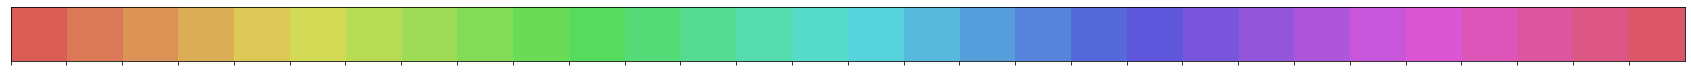

In [40]:
n_class = len(class_list) # 测试集标签类别数
palette = sns.hls_palette(n_class) # 配色方案
sns.palplot(palette)

In [41]:
# 随机打乱颜色列表和点型列表
import random
random.seed(1234)
random.shuffle(marker_list)
random.shuffle(palette)

## t-SNE降维至二维

In [ ]:
# 降维到二维和三维
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, n_iter=20000)
X_tsne_2d = tsne.fit_transform(encoding_array)

/environment/miniconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/environment/miniconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [42]:
X_tsne_2d.shape

(1079, 2)

## 可视化展示

In [20]:
# 不同的 符号 表示 不同的 标注类别
show_feature = '标注类别名称'

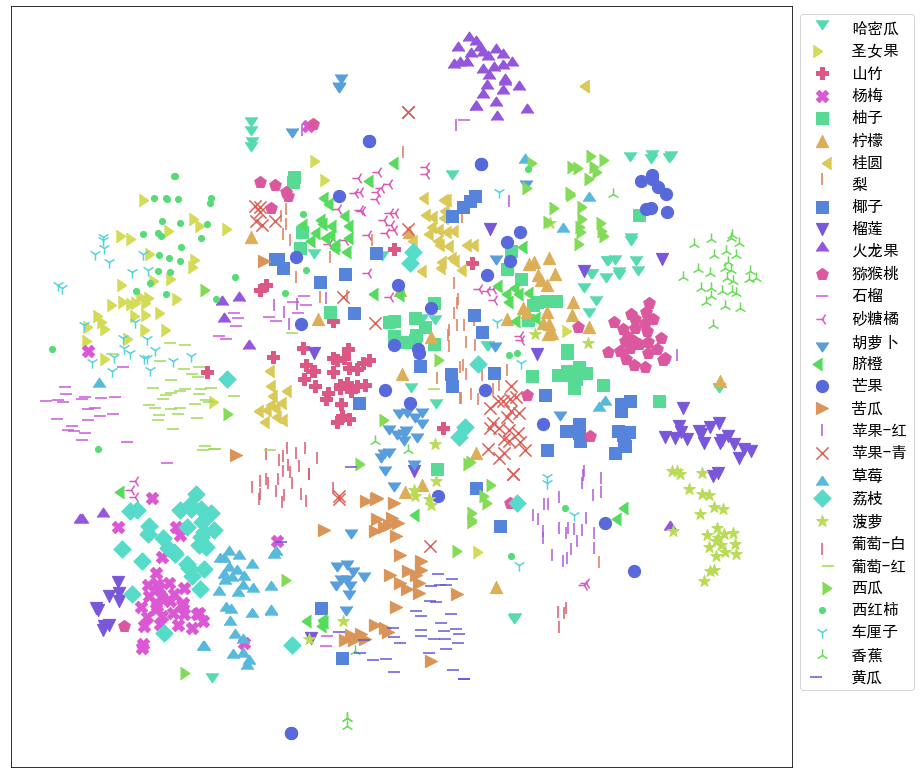

In [43]:
plt.figure(figsize=(14, 14))
for idx, fruit in enumerate(class_list): # 遍历每个类别
    # 获取颜色和点型
    color = palette[idx]
    marker = marker_list[idx%len(marker_list)]

    # 找到所有标注类别为当前类别的图像索引号
    indices = np.where(df[show_feature]==fruit)
    plt.scatter(X_tsne_2d[indices, 0], X_tsne_2d[indices, 1], color=color, marker=marker, label=fruit, s=150)

plt.legend(fontsize=16, markerscale=1, bbox_to_anchor=(1, 1))
plt.xticks([])
plt.yticks([])
plt.savefig('语义特征t-SNE二维降维可视化.pdf', dpi=300) # 保存图像
plt.show()

## plotply交互式可视化

In [44]:
import plotly.express as px

In [45]:
df_2d = pd.DataFrame()
df_2d['X'] = list(X_tsne_2d[:, 0].squeeze())
df_2d['Y'] = list(X_tsne_2d[:, 1].squeeze())
df_2d['标注类别名称'] = df['标注类别名称']
df_2d['预测类别'] = df['top-1-预测名称']
df_2d['图像路径'] = df['图像路径']
df_2d.to_csv('t-SNE-2D.csv', index=False)

In [46]:
df_2d

,X,Y,标注类别名称,预测类别,图像路径
0,28.750668,13.468358,哈密瓜,柚子,fruit30_split/val/哈密瓜/106.jpg
1,0.130025,17.642849,哈密瓜,桂圆,fruit30_split/val/哈密瓜/109.jpg
2,15.105215,5.844354,哈密瓜,哈密瓜,fruit30_split/val/哈密瓜/114.jpg
3,48.017620,0.207839,哈密瓜,哈密瓜,fruit30_split/val/哈密瓜/116.jpg
4,-9.501915,17.861477,哈密瓜,柚子,fruit30_split/val/哈密瓜/118.png
...,...,...,...,...,...
1074,11.080460,-36.368721,黄瓜,黄瓜,fruit30_split/val/黄瓜/87.jpg
1075,6.440228,-29.324959,黄瓜,黄瓜,fruit30_split/val/黄瓜/9.jpg
1076,2.529796,-30.954199,黄瓜,黄瓜,fruit30_split/val/黄瓜/91.png
1077,6.524212,-31.980818,黄瓜,黄瓜,fruit30_split/val/黄瓜/94.jpg


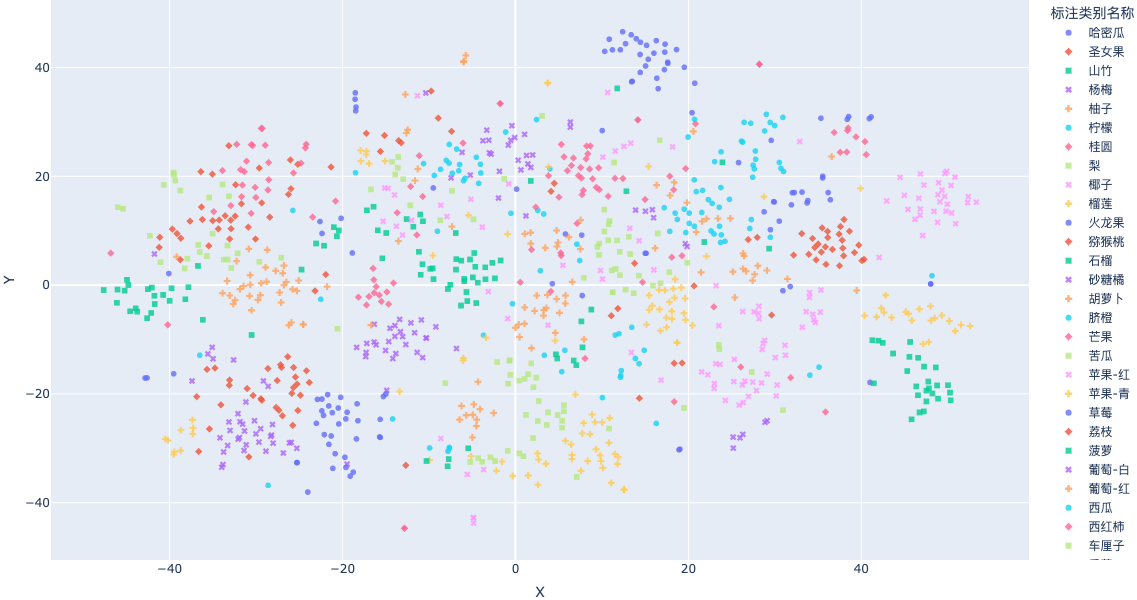

In [ ]:
fig = px.scatter(df_2d, 
                 x='X', 
                 y='Y',
                 color=show_feature, 
                 labels=show_feature,
                 symbol=show_feature, 
                 hover_name='图像路径',
                 opacity=0.8,
                 width=1000, 
                 height=600
                )
# 设置排版
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()
fig.write_html('语义特征t-SNE二维降维plotly可视化.html')

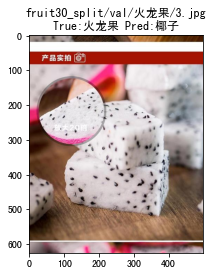

In [51]:
# 查看图像
img_path = 'fruit30_split/val/火龙果/3.jpg'
img_bgr = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
temp_df = df[df['图像路径'] == img_path]
title_str = img_path + '\nTrue:' + temp_df['标注类别名称'].item() + ' Pred:' + temp_df['top-1-预测名称'].item()
plt.title(title_str)
plt.show()

## t-SNE降维至三维，并可视化

In [53]:
# 降维到三维
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, n_iter=10000)
X_tsne_3d = tsne.fit_transform(encoding_array)

/environment/miniconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/environment/miniconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [54]:
X_tsne_3d.shape

(1079, 3)

In [55]:
show_feature = '标注类别名称'
# show_feature = '预测类别'

In [56]:
df_3d = pd.DataFrame()
df_3d['X'] = list(X_tsne_3d[:, 0].squeeze())
df_3d['Y'] = list(X_tsne_3d[:, 1].squeeze())
df_3d['Z'] = list(X_tsne_3d[:, 2].squeeze())
df_3d['标注类别名称'] = df['标注类别名称']
df_3d['预测类别'] = df['top-1-预测名称']
df_3d['图像路径'] = df['图像路径']
df_3d.to_csv('t-SNE-3D.csv', index=False)

In [57]:
df_3d

,X,Y,Z,标注类别名称,预测类别,图像路径
0,160.066025,-295.908447,-73.774239,哈密瓜,柚子,fruit30_split/val/哈密瓜/106.jpg
1,-114.150078,-28.226063,-438.905151,哈密瓜,桂圆,fruit30_split/val/哈密瓜/109.jpg
2,29.681345,-135.613998,179.593002,哈密瓜,哈密瓜,fruit30_split/val/哈密瓜/114.jpg
3,335.354797,-192.659348,42.843052,哈密瓜,哈密瓜,fruit30_split/val/哈密瓜/116.jpg
4,7.286541,280.846497,83.750504,哈密瓜,柚子,fruit30_split/val/哈密瓜/118.png
...,...,...,...,...,...,...
1074,142.894363,-87.920486,123.490814,黄瓜,黄瓜,fruit30_split/val/黄瓜/87.jpg
1075,356.977875,206.594467,-39.562893,黄瓜,黄瓜,fruit30_split/val/黄瓜/9.jpg
1076,273.865021,265.929077,106.510086,黄瓜,黄瓜,fruit30_split/val/黄瓜/91.png
1077,369.897034,173.925613,31.475468,黄瓜,黄瓜,fruit30_split/val/黄瓜/94.jpg


In [58]:
fig = px.scatter_3d(df_3d, 
                    x='X', 
                    y='Y', 
                    z='Z',
                    color=show_feature, 
                    labels=show_feature,
                    symbol=show_feature, 
                    hover_name='图像路径',
                    opacity=0.6,
                    width=1000, 
                    height=800)

# 设置排版
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()
fig.write_html('语义特征t-SNE三维降维plotly可视化.html')